In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

Week3: find the max cut of given graph

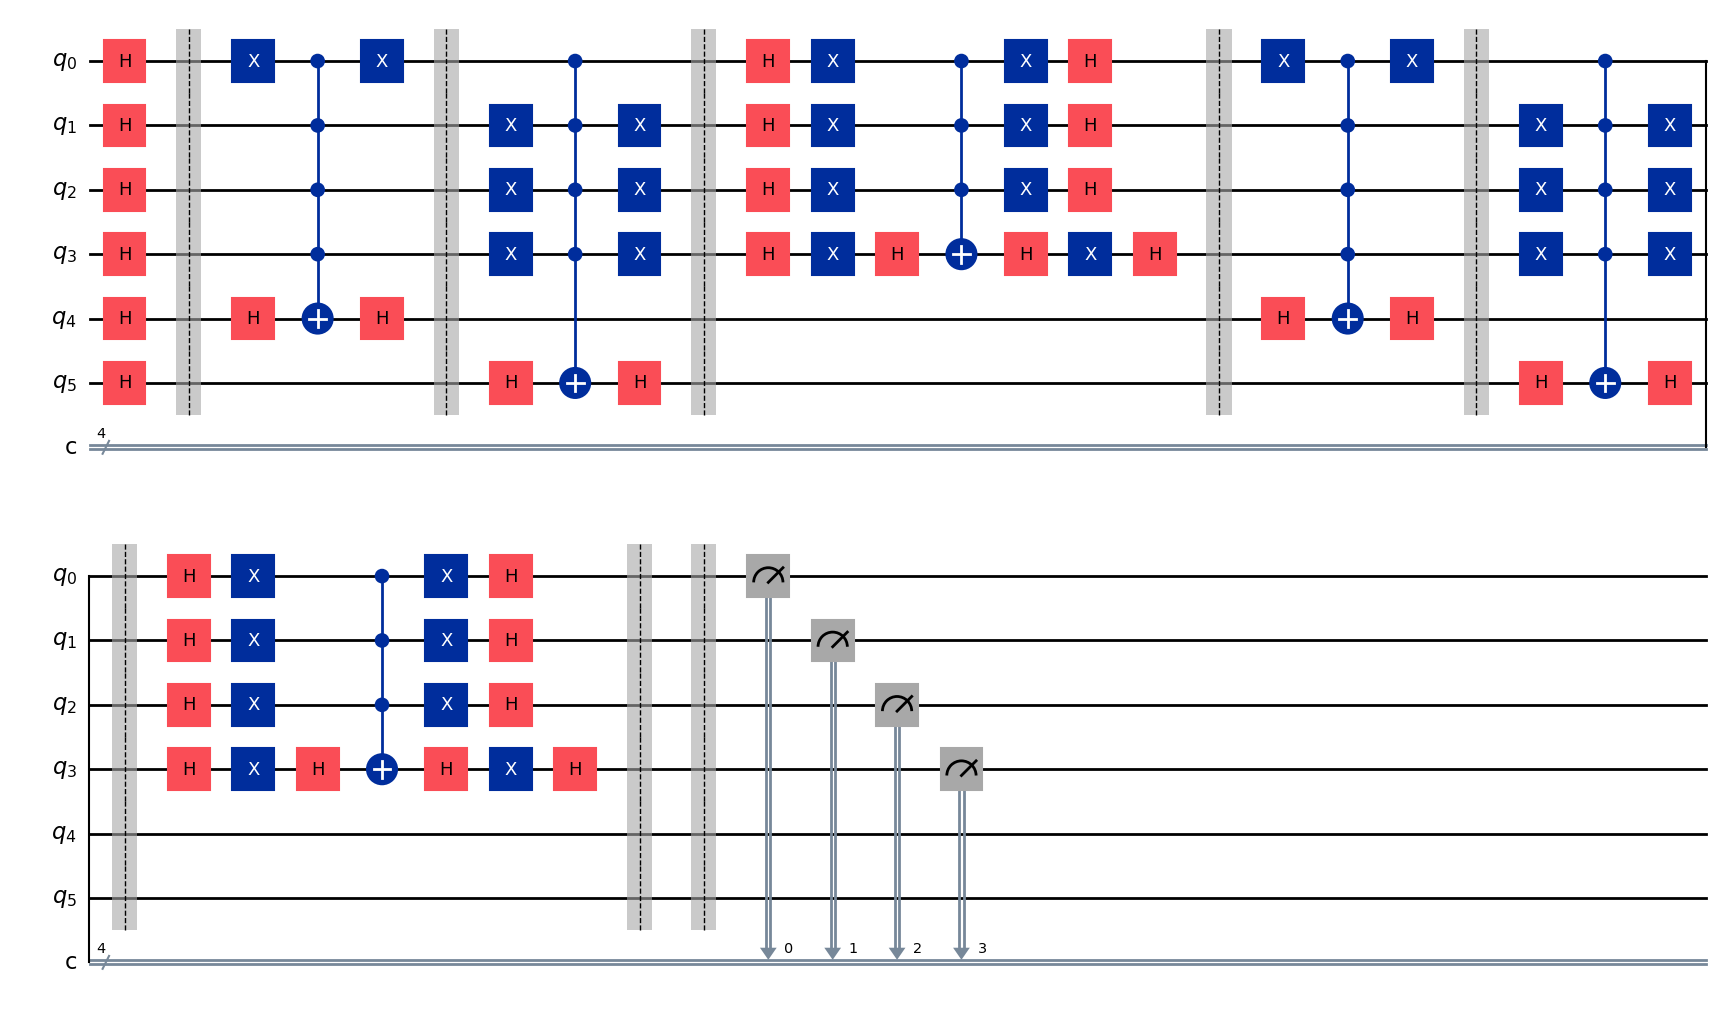

In [2]:
# grover's algorithm with 2 bits version 1
simulator = AerSimulator()
qc = QuantumCircuit(6,4)
iter = 2
#initialization
for i in range(6):
    qc.h(i)

qc.barrier()

# grover's algortirhm
for i in range(iter):
    qc.x(0)
    qc.h(4)
    qc.mcx([0,1,2,3],4)
    qc.h(4)
    qc.x(0)

    qc.barrier()

    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.h(5)
    qc.mcx([0,1,2,3],5)
    qc.h(5)
    qc.x(1)
    qc.x(2)
    qc.x(3)


    qc.barrier()
    #diffusion
    for i in range(4):
        qc.h(i)
    for i in range(4):
        qc.x(i)
    qc.h(3)
    qc.mcx([0,1,2],3)
    qc.h(3)
    for i in range(4):
        qc.x(i)
    for i in range(4):
        qc.h(i)
    qc.barrier()

# do the flipping

qc.barrier()

qc.measure([0,1,2,3],[0,1,2,3])
display(qc.draw())


Total counts: {'1010': 199, '0100': 200, '1101': 204, '1110': 3545, '0001': 3610, '1111': 207, '0010': 174, '0000': 226, '0101': 216, '1001': 192, '1100': 198, '0110': 202, '1000': 207, '1011': 215, '0111': 204, '0011': 201}


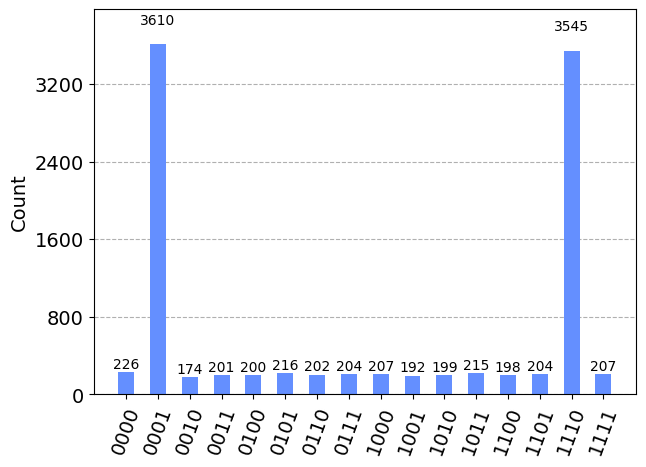

In [3]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

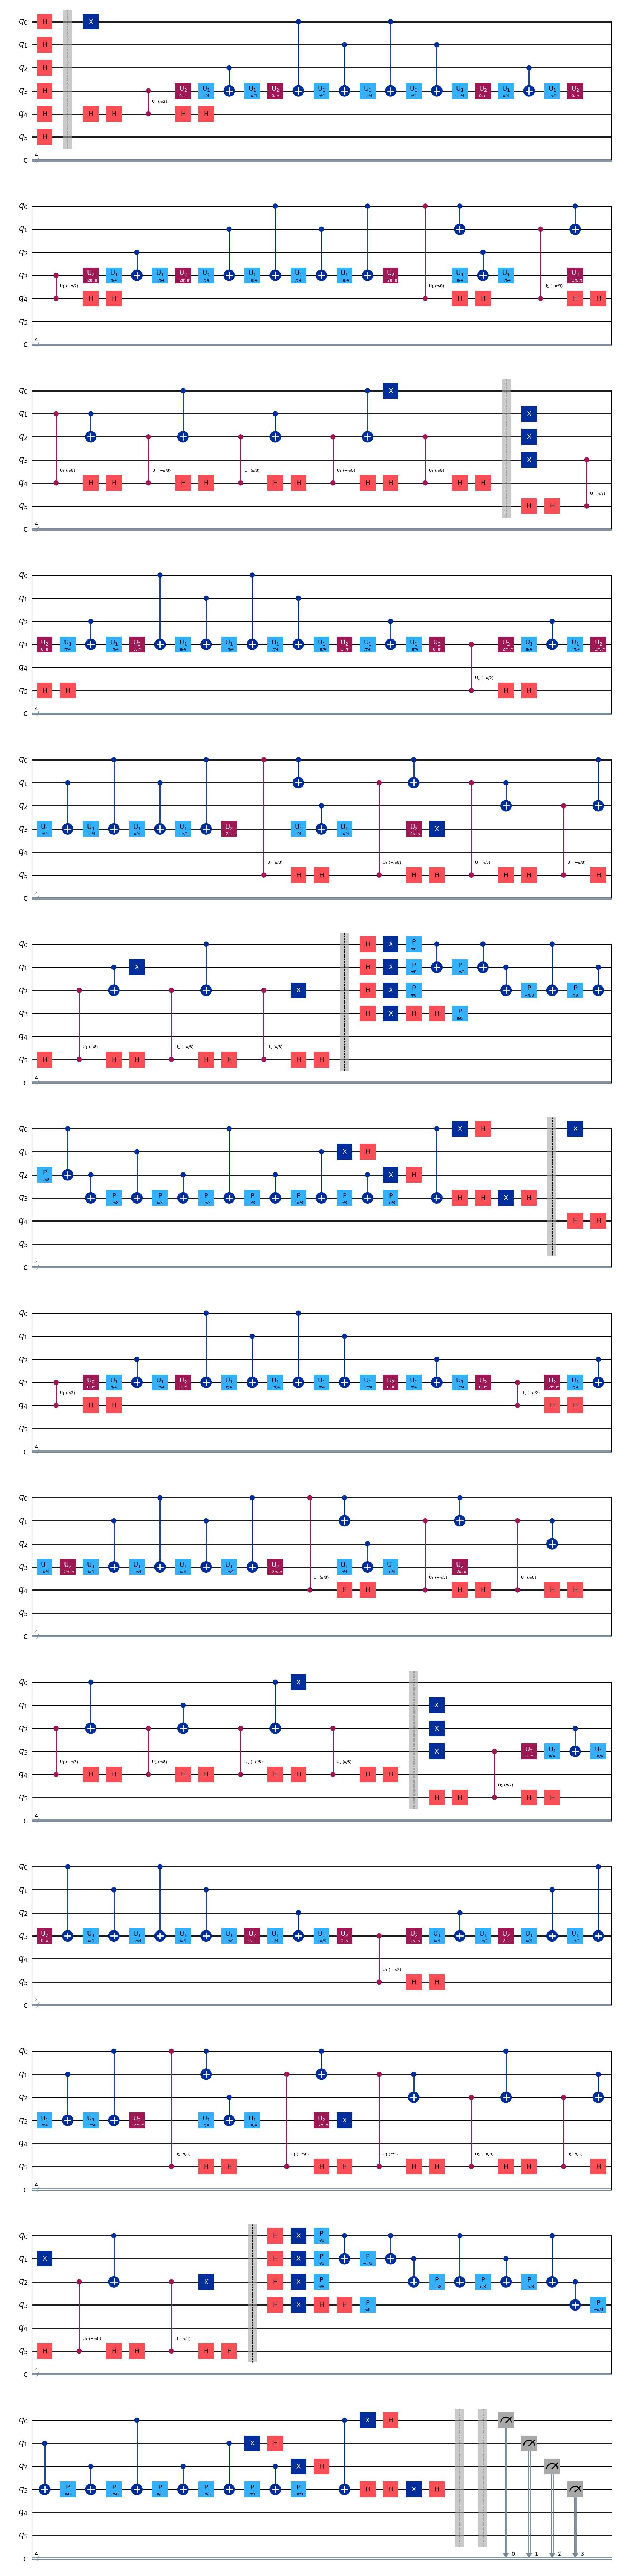

In [5]:
#now let's check the quantum cost of this circuit by using the Unroller.\
from qiskit.transpiler.passes import BasisTranslator, UnrollCustomDefinitions
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates.equivalence_library import (StandardEquivalenceLibrary as std_eqlib,)

basis_gates = ['u3', 'cx']
pm = PassManager([
    UnrollCustomDefinitions(std_eqlib, basis_gates)
    #BasisTranslator(std_eqlib, basis_gates)# doesnt work with mcx gates, maybe make with smth else later
])

new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [6]:
new_circuit.count_ops()

OrderedDict([('h', 110),
             ('cx', 100),
             ('u1', 64),
             ('cu1', 36),
             ('x', 32),
             ('u2', 32),
             ('p', 30),
             ('barrier', 8),
             ('measure', 4)])